Importing packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from sklearn.preprocessing import LabelEncoder

Read the csv file

In [4]:
data=pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Shape of the data

In [7]:
data.shape

(1338, 7)

-> The shape function is used to show the number of rows and colums in a dataset

2. Data type of each attribute

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


-> info function is used to check the datatype of all columns

3. Checking the presence of missing values

In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

-> isnull function is used to check the missing values in dataset

In [15]:
data.isna().apply(pd.value_counts)

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_8380\2265488785.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  data.isna().apply(pd.value_counts)


,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


4. 5 point summary of numerical attributes

In [17]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


-> describe function is used to calculate five number summary
-> The case stdudy is done on people within age group of 18-64
-> The average age of peoples in the case study is 39
-> The average number of childrens covered by the insurance in the range of 1-5
-> The average medical cost will be the range of 13270-63770


5. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

Text(0.5, 0, 'charges')

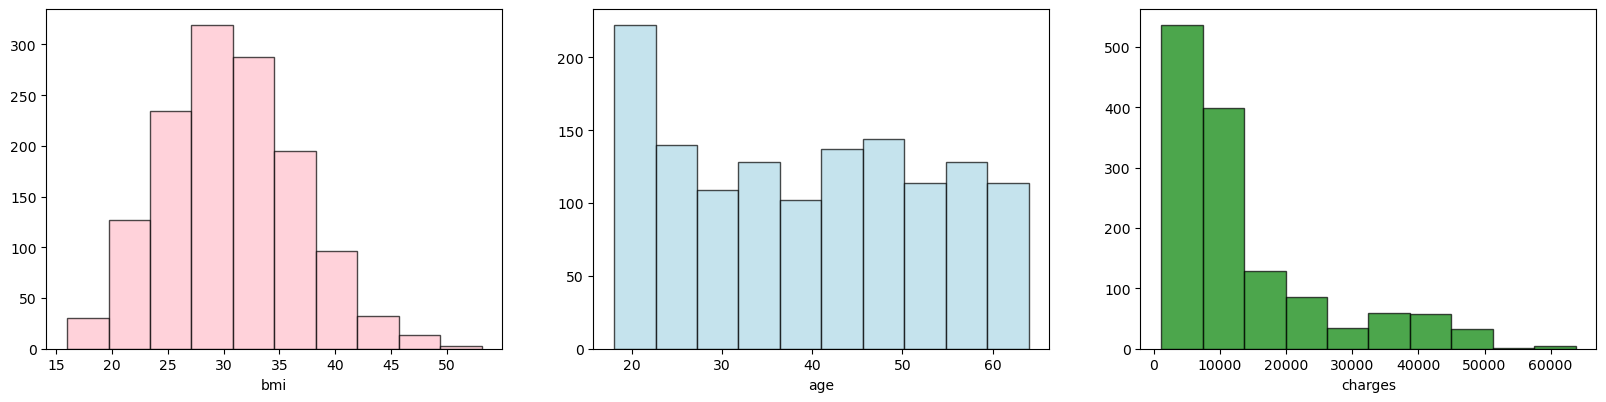

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.hist(data.bmi,color='pink',edgecolor='black',alpha=0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(data.age,color='lightblue',edgecolor='black',alpha=0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(data.charges,color='green',edgecolor='black',alpha=0.7)
plt.xlabel('charges')

-> The histogram graph is displaying the distribution of BMI data.
-> It is an symmetrical bell shaped distribution.
-> The highest frequency occurs around the bmi of 30.

-> The histogram graph displaying the distribution of ages.
-> The highest frequency is in the age group between 20-25
-> the lowest frequency is in the age group with 40-45.

-> The histogram graph displaying the distribution of charges.
-> The distribution is right-skewed(positive-skew).
-> It has a longer tail of on the right side.
-> The highest frequency of charges falls within the range of 0-10,000.

6. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [25]:
skewness = pd.DataFrame({'Skewness':[sts.skew(data.bmi),sts.skew(data.age),sts.skew(data.charges)]},index=['bmi','age','charges'])
skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_8380\881454336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'],color='red')


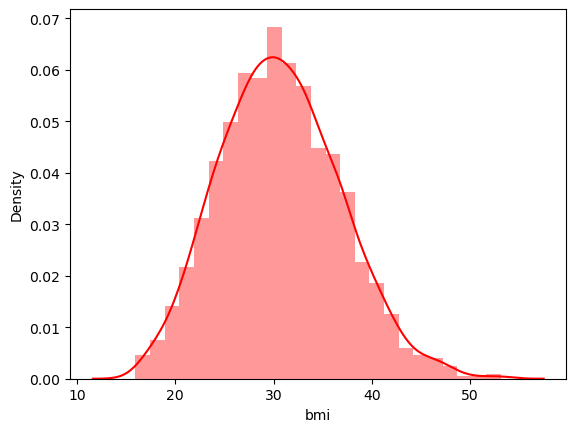

In [26]:
sns.distplot(data['bmi'],color='red')
plt.show()

-> The graph displays a Normal Distribution-a bell shaped curve.
-> The graph is symmetrical.
-> The peek of the curve representing the mean value around the bmi of 30.

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_8380\3668578308.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


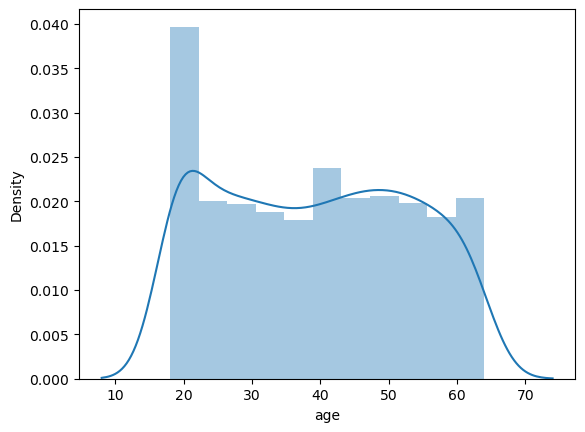

In [28]:
sns.distplot(data['age'])
plt.show()

-> The distribution is not symmetrical it is an asymmetric.
-> The highest density is around the age of 20.

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_8380\2192260893.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'],color='green')


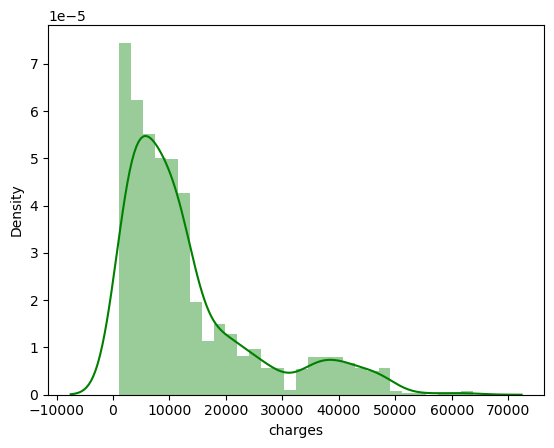

In [30]:
sns.distplot(data['charges'],color='green')
plt.show()

-> The distribution is right-skewed(positively skewed).
-> The most of the data points are concentrated on the left side of the graph.
-> The highest frequency of charges falls within the range of 0-10,000.

6. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

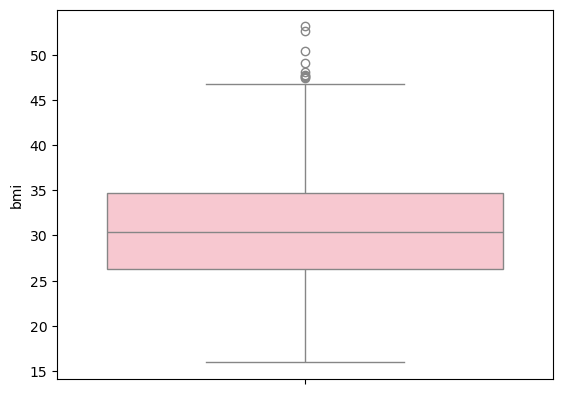

In [33]:
sns.boxplot(data['bmi'],color='pink')
plt.show()

-> The boxplot displays the distribution of BMI.
-> The line inside the box represents the median of the data.
-> The median BMI is approximately 30.
-> The IQR range from 27-35 indicating that 50% of the data falls within the range.
-> There are several outliers above the upper whisker.
-> The minimum BMI is around 16 and the maximum is 46.

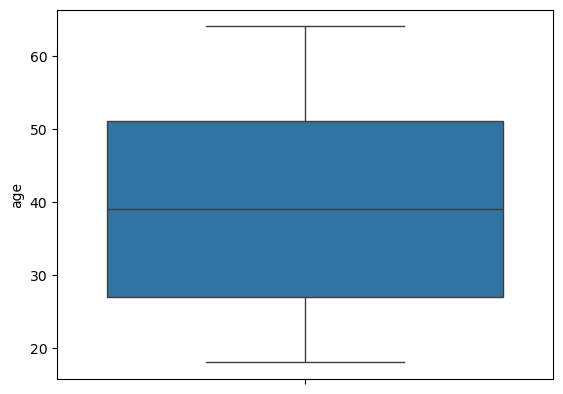

In [35]:
sns.boxplot(data['age'])
plt.show()

-> The boxplot displays the distribution of BMI.
-> The line inside the box represents the median of the data.
-> The median age is approximately 40.
-> There are no outliers in the data as no points are plotted outside the whiskers.

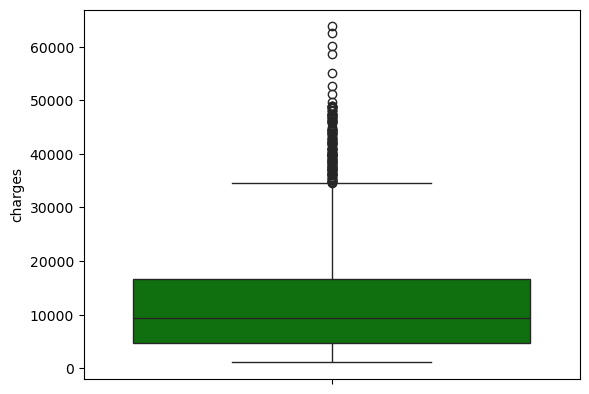

In [37]:
sns.boxplot(data['charges'],color='green')
plt.show()

-> The boxplot displays the distribution of charges.
-> The line inside the box represents the median of the data.
-> The median charge is approximately 10,000.
-> The graph shows several outliers above the upper whisker. 

7. Distribution of categorical columns

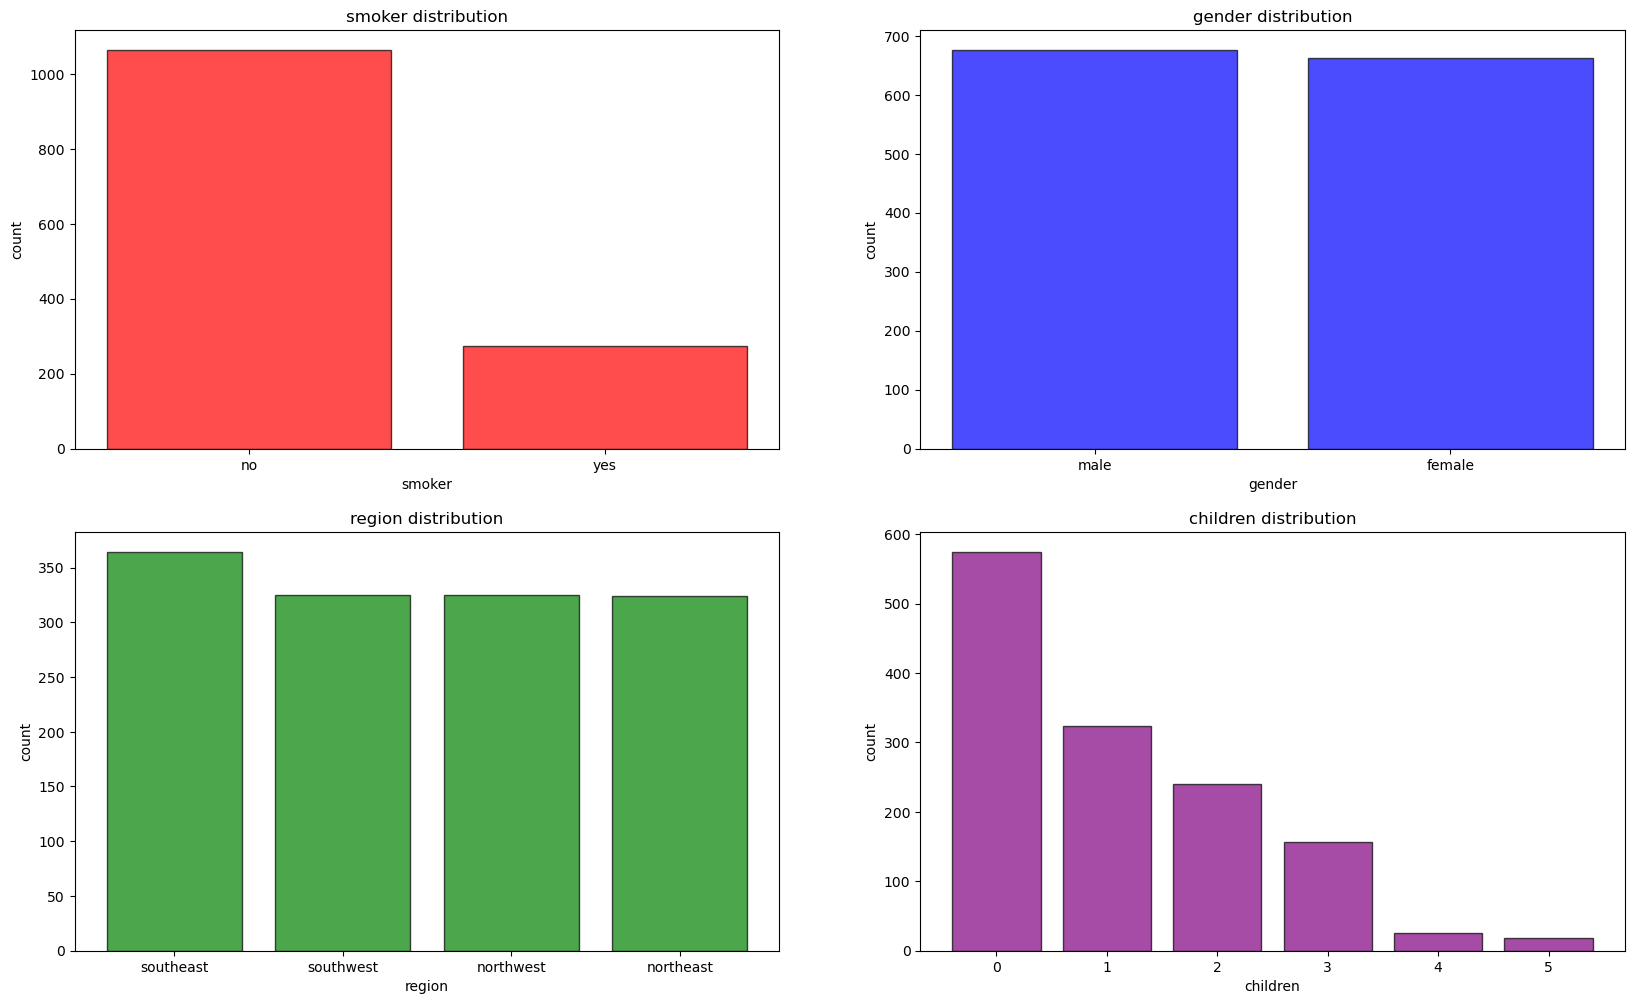

In [40]:
plt.figure(figsize=(20,25))
x=data.smoker.value_counts().index
y=[data['smoker'].value_counts()[i] for i in x]
plt.subplot(4,2,1)
plt.bar(x,y,align='center',color='red',edgecolor='black',alpha=0.7)
plt.xlabel('smoker')
plt.ylabel('count')
plt.title('smoker distribution')

x1=data.sex.value_counts().index
y1=[data['sex'].value_counts()[j] for j in x1]
plt.subplot(4,2,2)
plt.bar(x1,y1,align='center',color='blue',edgecolor='black',alpha=0.7)
plt.xlabel('gender')
plt.ylabel('count')
plt.title('gender distribution')

x2=data.region.value_counts().index
y2=[data['region'].value_counts()[k] for k in x2]
plt.subplot(4,2,3)
plt.bar(x2,y2,align='center',color='green',edgecolor='black',alpha=0.7)
plt.xlabel('region')
plt.ylabel('count')
plt.title('region distribution')

x3=data.children.value_counts().index
y3=[data['children'].value_counts()[l] for l in x3]
plt.subplot(4,2,4)
plt.bar(x3,y3,align='center',color='purple',edgecolor='black',alpha=0.7)
plt.xlabel('children')
plt.ylabel('count')
plt.title('children distribution')

plt.show()

8. Pair plot that includes all the columns of the data frame

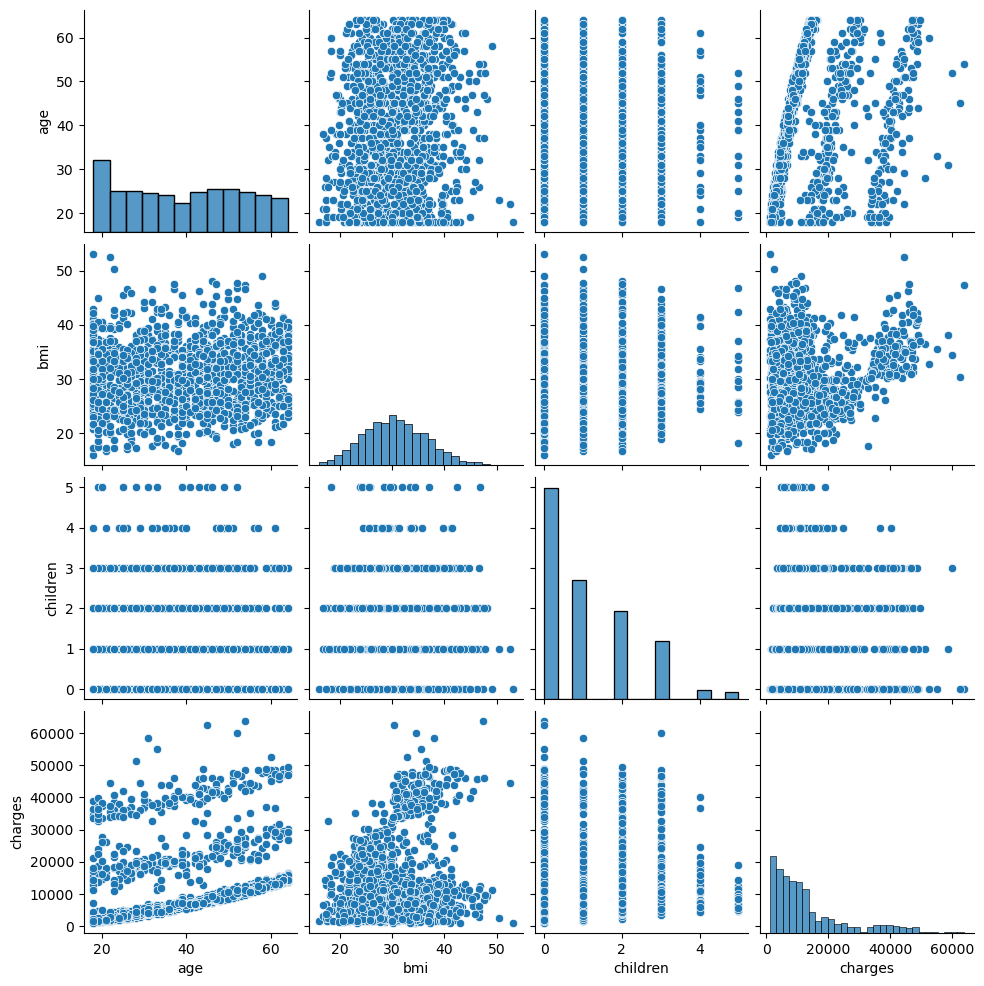

In [42]:
sns.pairplot(data)
plt.show()

Inferential statistics

In [44]:
data.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='charges'>

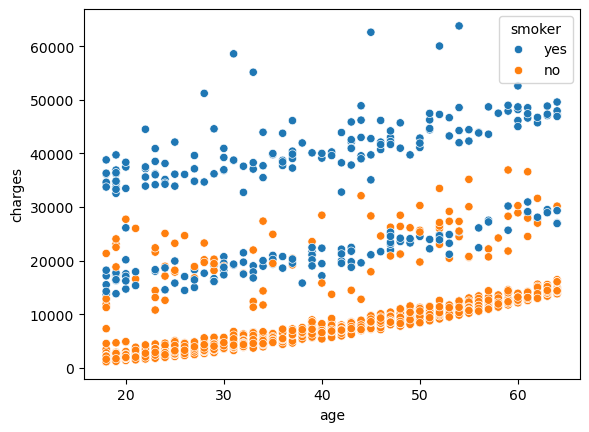

In [45]:
sns.scatterplot(x='age',y='charges',hue='smoker',data=data)

In [46]:
H0="Charges of smoker and non-smoker are same"
Ha="Charges of smoker and non-smoker are not same"

x=np.array(data[data.smoker=='yes'].charges)
y=np.array(data[data.smoker=='No'].charges)

t,p_value=sts.ttest_ind(x,y,axis=0)

if p_value<0.05:
    print(f'{Ha} as the p_value({p_value}) < 0.05')
else:
    print(f'{H0} as the p_value({p_value}) < 0.05')

Charges of smoker and non-smoker are same as the p_value(nan) < 0.05


In [47]:
H0="Bmi of male and female are same"
Ha="Bmi of male and female are not same"

x=np.array(data[data.sex=='female'].bmi)
y=np.array(data[data.sex=='male'].bmi)

t,p_value=sts.ttest_ind(x,y,axis=0)

if p_value < 0.05:
    print(f'{Ha} as the p_value({p_value}) > 0.05')
else:
    print(f'{H0} as the p_value({p_value}) < 0.05')

Bmi of male and female are same as the p_value(0.08997637178984932) < 0.05


In [48]:
H0="Gender has no effect on smoker habits"
Ha="Gender has an effect on smoker habits"

crosstab=pd.crosstab(data['smoker'],data['sex'])

chi,p_value,dof,exp=sts.chi2_contingency(crosstab)

if p_value < 0.05:
    print(f'{Ha} as the p_value({p_value}) > 0.05')
else:
    print(f'{H0} as the p_value({p_value}) < 0.05')

Gender has an effect on smoker habits as the p_value(0.006548143503580696) > 0.05


In [49]:
H0="Distribution of bmi across women with no children, one child and two children are not same"
Ha="Distribution of bmi across women with no children, one child and two children are same" 

female=data[data.sex == 'female']

zero = np.array(female[female.children == 0].bmi)
one= np.array(female[female.children == 1].bmi)
two = np.array(female[female.children == 2].bmi)

f_sts,p_val=sts.f_oneway(zero,one,two)

if p_value < 0.05:
    print(f'{Ha} as the p_value({p_value}) > 0.05')
else:
    print(f'{H0} as the p_value({p_value}) < 0.05')

Distribution of bmi across women with no children, one child and two children are same as the p_value(0.006548143503580696) > 0.05
